# Final Project


Assignment for students of the Data Science Degree module IV - Programming Techniques I at Let's Code.

Professor: [Pedro Gengo](https://github.com/pedrogengo)

**Peers of this assignment were**:

* [Daniel Aquino](https://github.com/DanWolks)

* [Jeremias Diefenthaler](https://github.com/JeremiasDief)

## Instructions

As part of the Data Science and Analytics team at Popolishoshop, a database with information about the last Black Friday has been assigned to be worked with.

The business team requested a report in which some requirements were specified as well as a study to be answered using the provided data.

For this challenge, [Black Friday's](https://www.kaggle.com/sdolezel/black-friday) dataset will be used. It gathers purchase transactions information at a retail shop.
This dataset was split into different files and it's the team's job to understand how they related to each other.

In order to practice data analysis, Pandas library will be used.

At the following table it's possible to see Column Names as well as field description.

| Coluna                 | Descrição                                                 |
|------------------------|-----------------------------------------------------------|
| User_ID                | ID do usuário                                             |
| Product_ID             | ID do produto                                             |
| Gender                 | Sexo do usuário                                           |
| Age                    | Ano em intervalos                                         |
| Occupation             | Ocupação (mascarada)                                      |
| City_Category          | Categoria da cidade (A, B, C)                             |
| StayInCurrentCityYears | Número de anos de permanência na cidade atual             |
| Marital_Status         | Estado civil                                              |
| ProductCategory1       | Categoria do produto (Mascarada)                          |
| ProductCategory2       | Categoria que o produto pode pertencer também (Mascarada) |
| ProductCategory3       | Categoria que o produto pode pertencer também (Mascarada) |
| Purchase               | Valor da compra                                           | 

Code developed must be designed to be reused. The assessment will be performed running the entire notebook with another dataframe, with the same columns. Therefore, think about quality and code reproduction.

In [1]:
#Importing necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.patches as mpatches

%matplotlib inline

from pandas_profiling import ProfileReport

## Analysis _Set up_

Read the three data bases provided and join them in a single DataFrame.

In [2]:
# This file had a different delimiter; therefore, it was necessary to specify it for readability.

df_user_profile = pd.read_csv("user_profile.csv", delimiter="|")
df_user_profile.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1


In [3]:
df_purchase = pd.read_csv("purchase.csv")
df_purchase.head()

,User_ID,Product_ID,Purchase
0,1000001,P00069042,8370
1,1000001,P00248942,15200
2,1000001,P00087842,1422
3,1000001,P00085442,1057
4,1000002,P00285442,7969


In [4]:
# This file had a different delimiter; therefore, it was necessary to specify it for readability.

df_product_info = pd.read_csv("product_info.csv", delimiter=";")
df_product_info.head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN
1,P00248942,1,6.0,14.0
2,P00087842,12,NaN,NaN
3,P00085442,12,14.0,NaN
4,P00285442,8,NaN,NaN


In [5]:
# Creating one single dataset with datas of the previous 3.
# As the purchase information is critical, it was set up as "left".

df_blackfriday_sales = pd.merge(df_purchase, df_user_profile, on="User_ID", how="outer")
df_blackfriday_sales = pd.merge(df_blackfriday_sales, df_product_info, on="Product_ID", how="outer")
df_blackfriday_sales

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,7120,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,F,26-35,7,A,0,1,8,NaN,NaN
537575,1002315,P00063442,1866,M,55+,7,C,4+,1,5,NaN,NaN


In [6]:
df_blackfriday_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Purchase                    537577 non-null  int64  
 3   Gender                      537577 non-null  object 
 4   Age                         537577 non-null  object 
 5   Occupation                  537577 non-null  int64  
 6   City_Category               537577 non-null  object 
 7   Stay_In_Current_City_Years  537577 non-null  object 
 8   Marital_Status              537577 non-null  int64  
 9   Product_Category_1          537577 non-null  int64  
 10  Product_Category_2          370591 non-null  float64
 11  Product_Category_3          164278 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 53.3+ MB


### Generating a report using Pandas Profile to have a better assessment of some of the data.

In [ ]:
#Using Profiling Pandas to generate reports

profile = ProfileReport(df_blackfriday_sales, title="Profiling Black Friday Sales", 
                        html={"style": {"full_width": True}})

In [ ]:
#In order to visualize inside Jupyter the profile just created
profile.to_notebook_iframe()

In [ ]:
#Saving the report into a file

profile.to_file("blackfriday_sales_report.html")

## Question 1

Please provide the number of observations and columns of the entire dataset (joining all databases). 
Answer with a tuple format `(n_observation, n_columns)`.

In [7]:
# Using the complete dataframe's "shape" to present the quantity of rows and columns

df_blackfriday_sales.shape

(537577, 12)

## Question 2

Please provided the number of women amongst the ages of 26 and 35 years in the dataset.
Answer as a single scalar.

In [9]:
# Creating a copy of the original dataframe
df_age_fem_26to35 = df_blackfriday_sales.copy()

# Checking wether there're duplicate users, which can impact the quantity of women aged between 26 to 35
print(df_age_fem_26to35["User_ID"].duplicated().sum())

# Checking how many unique users exist in the data, since there's duplicated data at the "User_ID" column
print(df_age_fem_26to35["User_ID"].nunique())

531686
5891


In [10]:
# Eliminating duplicate data at "User_ID" column in order to have the real quantity of women aged between 26 to 35 years

df_age_fem_26to35.drop_duplicates(subset=["User_ID"], inplace=True)
df_age_fem_26to35

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
179643,1000821,P00195542,9644,M,18-25,2,C,2,0,2,12.0,NaN
211208,1005043,P00230442,18811,F,18-25,6,C,2,0,14,NaN,NaN
212738,1004331,P00128942,7959,M,36-45,6,B,3,0,1,11.0,NaN
220977,1002908,P00250642,7630,M,18-25,2,C,3,0,11,NaN,NaN


In [11]:
#This is the function used in order to group information while counting the values to check age groups and gender

df_age_fem_26to35.groupby(['Gender'])["Age"].value_counts()

Gender  Age  
F       26-35     545
        36-45     333
        18-25     287
        46-50     182
        51-55     142
        55+        99
        0-17       78
M       26-35    1508
        36-45     834
        18-25     782
        46-50     349
        51-55     339
        55+       273
        0-17      140
Name: Age, dtype: int64

In [12]:
# After finding in which position the age group wanted was, index was used to bring only that piece of info.

df_age_fem_26to35.groupby(['Gender'])["Age"].value_counts()[0]

545

## Question 3

Please provide the number of unique users of the dataset. Answer as a single scalar.

In [13]:
# This function returns the number of unique users by "User_ID" column.

df_blackfriday_sales["User_ID"].nunique()

5891

## Question 4

Please inform the record percentage (row percentage) with at least one null value (`None`, `ǸaN` etc). 
Answer as a single scalar between 0 and 1.

In [14]:
# Presenting the percentage of null data by column

(df_blackfriday_sales.isnull().sum() / (df_blackfriday_sales.isnull().sum() + df_blackfriday_sales.notnull().sum()))

User_ID                       0.000000
Product_ID                    0.000000
Purchase                      0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
dtype: float64

In [15]:
# Creating a copy of the original dataframe
df_na_drop = df_blackfriday_sales.copy()

row_na_drop = df_na_drop.dropna().shape[0] # Removes rows that have at least 1 null value
print(f"Total of DataFrame's complete rows (without any null data): {row_na_drop}")

# Using the inverted percentage of complete rows, we have the percentage of rows with at least one null value
percent_row_null = 1 - (row_na_drop / df_blackfriday_sales.shape[0])

# Presenting a single scalar, rounding 7 after the comma, the row percentage with at least one null value
round(percent_row_null, 7)

Total of DataFrame's complete rows (without any null data): 164278


0.6944103

## Question 5

Inform the existing quantity of null values in the variable (column) with the highest number of nulls. Answer as a single scalar.

In [16]:
# Presenting the data number for nulls at "Product_Category_3" column, which has the greatest number of nulls

df_blackfriday_sales["Product_Category_3"].isnull().sum()

373299

## Question 6

Inform the most frequent value (without nulls) at `Product_Category_3`. Answer as a single scalar.

In [17]:
# Here it was mapped which how many times each value appeared using "value counts"

df_blackfriday_sales["Product_Category_3"].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [18]:
# After finding how many times each number appeared, using "idmax" it was possible to bring the most frequent value

df_blackfriday_sales["Product_Category_3"].value_counts().idxmax()

16.0

## Question 7

Is it possible to assume that if an observation is null at `Product_Category_2` it is also null at `Product_Category_3`? 
Answer with a bool (`True`, `False`).

In [19]:
# Creating a new data frame only with rows in which "Product_Category_2" has null value 

df_category2_isnull = df_blackfriday_sales[df_blackfriday_sales["Product_Category_2"].isnull()]
df_category2_isnull

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537571,1005717,P00206942,15224,M,26-35,0,B,3,1,1,NaN,NaN
537572,1005754,P00234942,7120,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,F,26-35,7,A,0,1,8,NaN,NaN


In [20]:
# Creating a new data frame only with rows in which "Product_Category_3" has null value

df_category3_isnull = df_blackfriday_sales[df_blackfriday_sales["Product_Category_3"].isnull()]
df_category3_isnull

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,7120,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,F,26-35,7,A,0,1,8,NaN,NaN
537575,1002315,P00063442,1866,M,55+,7,C,4+,1,5,NaN,NaN


In [21]:
'''
    Comparing the quantity of null data at "Product_Category_3" columm against the dataframe "df_category2_isnul"
    with total row numbers of this same data frame.
    This way, it's possible to analyse that whenever the value in column "Product_Category_2" is null,
    it's also going to be null at "Product_Category_3 column." 
    
    ''' 


df_category2_isnull["Product_Category_3"].isnull().sum() == df_category2_isnull.shape[0]

True

## Question 8

Inform the ID of the user who spent the most at Black Friday.

In [22]:
# Summing up Purchase total to its "User_ID" to identify how much each user actually purchased

df_blackfriday_sales.groupby(["User_ID"])["Purchase"].sum().sort_values(ascending=False)

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
             ...   
1004464       46091
1005944       46070
1005012       45551
1005117       44432
1004991       44108
Name: Purchase, Length: 5891, dtype: int64

In [23]:
# After finding purchase total by "User_ID", using "idmax" it was possible to bring the ID of the heaviest spender

heavy_spender = df_blackfriday_sales.groupby(["User_ID"])["Purchase"].sum().idxmax()
heavy_spender

1004277

## Question 9

Inform which group (men or women) spent the most during Black Friday.

In [24]:
'''
    Counting the amount of men and women.
    Not excluding "Uder_ID" column repeated data since the same male or female user could have made more than 
    one purchase, impacting the total amount spent.
'''

df_blackfriday_sales["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [25]:
# Maximum amount spent by gender

df_blackfriday_sales.groupby(by=["Gender"])[["Purchase"]].max()

,Purchase
Gender,
F,23959
M,23961


In [26]:
''' 
    Grouping the "Gender" column it's possible to obtain the average amount spent by genre,
    as well as to determine that "Male" was the genre that, on average, spent the most during Black Friday
    
    It's important to highlight that using the average is the most coherent statistical solution than simply 
    summing up the total amount spent by gender. The sum can mask that, for exemple, a single user is spending an 
    outstand amount which is way off, distorting the final conclusion of this answer. 
'''

df_blackfriday_sales.groupby(by=["Gender"])[["Purchase"]].mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


## Question 10

Create a new table with the most purchased category by each customer.

Note: if one bought a product that has values in the three category columns, every category must then be considered.

In [27]:
# Making a copy of the original dataframe

df_by_category = df_blackfriday_sales.copy()

In [28]:
    '''
     Applying "melt" into the complete dataframe having "Users_ID" column as index variable 
     while "Product_Category_1", "Product_Category_2" and "Product_Category_3" are set as values
    '''

    
df_by_category = pd.melt(df_by_category[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3"]], id_vars=["User_ID"], value_name="Category_Options")
df_by_category

,User_ID,variable,Category_Options
0,1000001,Product_Category_1,3.0
1,1000017,Product_Category_1,3.0
2,1000023,Product_Category_1,3.0
3,1000030,Product_Category_1,3.0
4,1000073,Product_Category_1,3.0
...,...,...,...
1612726,1005754,Product_Category_3,NaN
1612727,1005948,Product_Category_3,NaN
1612728,1006001,Product_Category_3,NaN
1612729,1002315,Product_Category_3,NaN


**Note**: At this exercise, from this point on, the solution was brought by the colleague [Daniel Watanabe](https://github.com/Daniel-Wata), who belongs to the Kung Fu Pandas group.

Previously, we had used "value_counts()".

In [29]:
# Grouping the last dataframe by "User_ID" and "Category_Options" columns, couting each option.

df_groupby_categ_opt = df_by_category.groupby(["User_ID", "Category_Options"]).count()
df_groupby_categ_opt = df_groupby_categ_opt.reset_index()
df_groupby_categ_opt

,User_ID,Category_Options,variable
0,1000001,1.0,4
1,1000001,2.0,3
2,1000001,3.0,11
3,1000001,4.0,13
4,1000001,5.0,5
...,...,...,...
82918,1006040,14.0,24
82919,1006040,15.0,19
82920,1006040,16.0,19
82921,1006040,17.0,9


In [30]:
#Pivot table to obtain quantity of products bought by cateogory option for each user

df_pv_users_categ_opt = df_groupby_categ_opt.pivot_table("variable", index="User_ID", 
                                                                                    columns="Category_Options", 
                                                                                    aggfunc=np.sum).fillna(0)
df_pv_users_categ_opt

Category_Options,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
User_ID,,,,,,,,,,,,,,,,,,
1000001,4.0,3.0,11.0,13.0,5.0,2.0,0.0,13.0,2.0,0.0,0.0,8.0,0.0,3.0,1.0,2.0,2.0,0.0
1000002,31.0,9.0,0.0,0.0,15.0,9.0,0.0,46.0,1.0,1.0,2.0,0.0,3.0,10.0,7.0,14.0,7.0,1.0
1000003,15.0,15.0,1.0,1.0,15.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0
1000004,13.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,3.0,1.0,0.0
1000005,18.0,5.0,2.0,4.0,26.0,9.0,5.0,57.0,0.0,1.0,5.0,2.0,4.0,13.0,6.0,21.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,81.0,41.0,14.0,26.0,140.0,34.0,7.0,209.0,8.0,11.0,39.0,9.0,16.0,73.0,79.0,65.0,15.0,6.0
1006037,14.0,5.0,0.0,2.0,25.0,12.0,0.0,61.0,4.0,4.0,4.0,1.0,8.0,16.0,14.0,38.0,9.0,1.0
1006038,0.0,0.0,2.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0


In [31]:
    '''
    Addition of a new column named "Max" at dataframe's end 
    this will bring which products in the category option were purchased the most by the user
    '''

df_pv_users_categ_opt["Max"] = df_pv_users_categ_opt.idxmax(axis=1)
df_pv_users_categ_opt

Category_Options,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max
User_ID,,,,,,,,,,,,,,,,,,,
1000001,4.0,3.0,11.0,13.0,5.0,2.0,0.0,13.0,2.0,0.0,0.0,8.0,0.0,3.0,1.0,2.0,2.0,0.0,4.0
1000002,31.0,9.0,0.0,0.0,15.0,9.0,0.0,46.0,1.0,1.0,2.0,0.0,3.0,10.0,7.0,14.0,7.0,1.0,8.0
1000003,15.0,15.0,1.0,1.0,15.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,1.0
1000004,13.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,3.0,1.0,0.0,1.0
1000005,18.0,5.0,2.0,4.0,26.0,9.0,5.0,57.0,0.0,1.0,5.0,2.0,4.0,13.0,6.0,21.0,2.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,81.0,41.0,14.0,26.0,140.0,34.0,7.0,209.0,8.0,11.0,39.0,9.0,16.0,73.0,79.0,65.0,15.0,6.0,8.0
1006037,14.0,5.0,0.0,2.0,25.0,12.0,0.0,61.0,4.0,4.0,4.0,1.0,8.0,16.0,14.0,38.0,9.0,1.0,8.0
1006038,0.0,0.0,2.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,5.0


## Question 11

Normalize the Purchase column. The normalization form is as follows:


$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [32]:
# Creating a copy of the original dataframe
df_purchase_normalized = df_blackfriday_sales.copy()

In [33]:
    '''
     "purchase_normalized" variable created using the data normalization formula 
     in order to normalize data at "Purchase" column
    '''

purchase_normalized = (df_purchase_normalized["Purchase"] - df_purchase_normalized["Purchase"].min()) / (df_purchase_normalized["Purchase"].max() - df_purchase_normalized["Purchase"].min())

# Addition of a new column named "Purchase_Normalized" at a copy of the original dataframe

df_purchase_normalized.insert(3, "Purchase_Normalized", purchase_normalized)
df_purchase_normalized

,User_ID,Product_ID,Purchase,Purchase_Normalized,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,0.344255,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,0.563846,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,0.455796,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,0.330207,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,0.450034,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,7120,0.291681,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,0.407554,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,0.087988,F,26-35,7,A,0,1,8,NaN,NaN
537575,1002315,P00063442,1866,0.070702,M,55+,7,C,4+,1,5,NaN,NaN


## Question 12

Does the marital status has an influence over the amount spent and at the product category bought? Demonstrate it.

In case the company wants to sell more products at the category 14, should it invest in advertisements to which marital status?

#### **For this analysis, it was assumed that "0" represents single customers while "1" stands for married customers*

In [34]:
# Creating a copy of the original dataframe

df_marital_status = df_blackfriday_sales.copy()

In [35]:
# Checking "Marital_Status" values

df_marital_status["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [36]:
# Grouping by "Marital_Status", filtering by "Purchase" mean in order to determine which marital status spends most

df_marital_purch = df_marital_status.groupby(by=["Marital_Status"])[["Purchase"]].mean()

df_marital_purch = df_marital_purch.reset_index()

df_marital_purch

,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


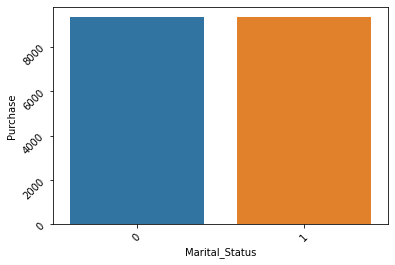

In [39]:
# Bringing data as a bar graph so it's easier to assess which marital status spent the most at Black Friday 

sns.barplot(x=("Marital_Status"), y=("Purchase"), data= df_marital_purch).tick_params(labelrotation=45)

In [40]:
'''
     Applying "melt" function at the complete dataframe, having "Marital_Status" column as variable
     and "Product_Category_1", "Product_Category_2" and "Product_Category_3" coluns were set to be value
'''



df_by_marital_status = pd.melt(df_marital_status, id_vars=["Marital_Status"], 
                                value_vars=["Product_Category_1", "Product_Category_2", 
                                            "Product_Category_3"], var_name="Categories", 
                                value_name="Category_Options").dropna()
df_by_marital_status

,Marital_Status,Categories,Category_Options
0,0,Product_Category_1,3.0
1,0,Product_Category_1,3.0
2,1,Product_Category_1,3.0
3,0,Product_Category_1,3.0
4,0,Product_Category_1,3.0
...,...,...,...
1612559,0,Product_Category_3,16.0
1612560,1,Product_Category_3,16.0
1612586,0,Product_Category_3,6.0
1612587,0,Product_Category_3,6.0


In [41]:
# Creating a new dataframe with the quantity of purchased products by category at each marital status

df_grouped_marital = df_by_marital_status.groupby(["Marital_Status", "Category_Options"]).count()
df_grouped_marital = df_grouped_marital.reset_index()
df_grouped_marital

,Marital_Status,Category_Options,Categories
0,0,1.0,83230
1,0,2.0,43401
2,0,3.0,14314
3,0,4.0,23823
4,0,5.0,114206
5,0,6.0,24685
6,0,7.0,2369
7,0,8.0,108569
8,0,9.0,10672
9,0,10.0,5300


In [42]:
# Total of products purchased by customers with single status

total_single_categ = df_grouped_marital[df_grouped_marital["Marital_Status"] == 0]["Categories"].sum()
total_single_categ

636344

In [43]:
# Total of products purchased by customers with married status

total_married_categ = df_grouped_marital[df_grouped_marital["Marital_Status"] == 1]["Categories"].sum()
total_married_categ

436102

In [44]:
'''
    Creating a series of percentual of products purchased in each category 
    by the total of products purchased by each marital status
'''

percent_by_categ = pd.concat([df_grouped_marital[df_grouped_marital["Marital_Status"] == 0]["Categories"] / total_single_categ,
                                df_grouped_marital[df_grouped_marital["Marital_Status"] == 1]["Categories"] / total_married_categ])
percent_by_categ

0     0.130794
1     0.068204
2     0.022494
3     0.037437
4     0.179472
5     0.038792
6     0.003723
7     0.170614
8     0.016771
9     0.008329
10    0.037819
11    0.016609
12    0.019185
13    0.067999
14    0.066205
15    0.079399
16    0.027083
17    0.009072
18    0.126399
19    0.065533
20    0.020569
21    0.033958
22    0.175739
23    0.037945
24    0.004389
25    0.181162
26    0.015448
27    0.010138
28    0.035799
29    0.017929
30    0.020605
31    0.069956
32    0.066503
33    0.077785
34    0.029608
35    0.010537
Name: Categories, dtype: float64

In [45]:
# Inserting a column in the "df_grouped_marital" with the purchased percentual by category for each marital status

df_grouped_marital["Percent_by_Category"] = percent_by_categ * 100

df_grouped_marital

,Marital_Status,Category_Options,Categories,Percent_by_Category
0,0,1.0,83230,13.079404
1,0,2.0,43401,6.820368
2,0,3.0,14314,2.249412
3,0,4.0,23823,3.743730
4,0,5.0,114206,17.947211
5,0,6.0,24685,3.879191
6,0,7.0,2369,0.372283
7,0,8.0,108569,17.061369
8,0,9.0,10672,1.677080
9,0,10.0,5300,0.832883


According to the data seen above, it's possible to identify that there're more single customers making purchases during Black Friday; however, the group that had higher expenditures were the married customers.

This tends to happen due to the difference in lifestyle amongst single customers and married ones.

Meaning that having a carefree lifestyle, i.e, with less financial responsibilities than a married person, single people can afford to purchase more products than a married person who needs to take into account household budgets, financial commitments, debts, etc. before actually purchasing stuff online.
Nonetheless, even though the data exhibits that there are more single customers, the average of items purchased by married customers presents higher values.
For example, while a single customer can purchase 10 products varying amongst stationary and office supplies, a married customer can purchase a single product, like a laptop, which would therefore surpass the total amount of the purchase made by the single customer.

Further analyzing the purchase behaviour of each marital status by category option, while verifying the expenditure percentage, more specifically looking at the data at the column "Percent_by_Category", it's possible to identify that the marital statues does not really influence the category of product purchase, since, proportionally, the amount of products purchased by category in each marital status it's almost equivalent.

In [46]:
# Bringing the quantity of category 14 products that each marital status bought

df_maritalstatus_0 = df_grouped_marital.iloc[13]
df_maritalstatus_1 = df_grouped_marital.iloc[31]

df_maritalstatus_0, df_maritalstatus_1

(Marital_Status             0.000000
 Category_Options          14.000000
 Categories             43271.000000
 Percent_by_Category        6.799938
 Name: 13, dtype: float64,
 Marital_Status             1.000000
 Category_Options          14.000000
 Categories             30508.000000
 Percent_by_Category        6.995611
 Name: 31, dtype: float64)

### Prediction of advertisement budget for Category 14 analysing customer behaviour by marital status.

Defining to which Marital Status the advertisement budget needs to be invested in order to sell more Category 14 products will depend solely on the company's strategy.

Single customers are organically buying more products in this category than married ones; therefore, if the company wants to play safe and ensure its sales will go through the roof, it would be logical to invest the advertisement budget into this group and further push sales.

However, if the company wants to capture married customers in order to change their purchase behaviour in this product category, it would be a smart financial budget decision to bombard adds to this group to entice the customer to buy. 
Nonetheless, it's necessary to observe that investing all the advertisement budget into this strategy will not guarantee the married customers receiving the adds will actually purchase products in this category.

## Question 13

Which variables had the most impact over the purchase price? How did the team reach this conclusion?

Variables: Gender | Age | Marital_Status | Occupation | City_Category | Stay_In_Current_City_Years

### **Data preprocessing**

Before assessing which variables have a great impact over purchase amount, first it's necessary to fix the ‘+’ sign both at "Age" and "Stay_In_Current_City_Years" columns.
In order to do so, the *.replace()* command is going to be used:

In [47]:
df_blackfriday_sales["Age"] = df_blackfriday_sales["Age"].apply(lambda x:str(x).replace('55+', '55'))
df_blackfriday_sales["Stay_In_Current_City_Years"] = df_blackfriday_sales["Stay_In_Current_City_Years"].apply(lambda x : str(x).replace('4+', '4'))
df_blackfriday_sales["Stay_In_Current_City_Years"] = df_blackfriday_sales["Stay_In_Current_City_Years"].astype('int')

In [48]:
# Checking correlation amongst variables of the original dataframe using "corr()" function.
df_blackfriday_sales.corr()

,User_ID,Purchase,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,0.005389,-0.023024,-0.030655,0.018732,0.003687,0.001471,0.004045
Purchase,0.005389,1.000000,0.021104,0.005470,0.000129,-0.314125,-0.209973,-0.022257
Occupation,-0.023024,0.021104,1.000000,0.031203,0.024691,-0.008114,-0.000031,0.013452
Stay_In_Current_City_Years,-0.030655,0.005470,0.031203,1.000000,-0.012663,-0.004182,-0.001781,0.002039
Marital_Status,0.018732,0.000129,0.024691,-0.012663,1.000000,0.020546,0.015116,0.019452
Product_Category_1,0.003687,-0.314125,-0.008114,-0.004182,0.020546,1.000000,0.540423,0.229490
Product_Category_2,0.001471,-0.209973,-0.000031,-0.001781,0.015116,0.540423,1.000000,0.543544
Product_Category_3,0.004045,-0.022257,0.013452,0.002039,0.019452,0.229490,0.543544,1.000000


### As previously seen at Question 09:

- Genre has a great influence over Purchase habits.
- Meaning "Male" users bought way more than the "Female" ones.
- Below there's again the data sampled to exhibit the importance of this variable to predict Customer Behaviour.


In [49]:
df_purchase_gender = df_blackfriday_sales.groupby(by=["Gender"])[["Purchase"]].mean()
df_purchase_gender = df_purchase_gender.reset_index()
df_purchase_gender

,Gender,Purchase
0,F,8809.761349
1,M,9504.771713


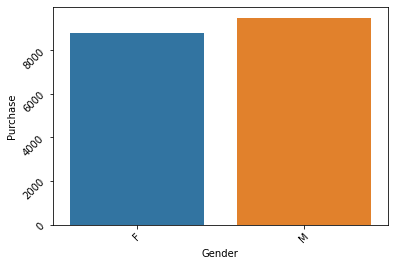

In [50]:
# Bringing data as a bar graph so it's easier to assess gender vs. purchase total

sns.barplot(x=("Gender"), y=("Purchase"), data=df_purchase_gender).tick_params(labelrotation=45)

#### As Genre has an impact over Purchase amount, it's necessary to determine weather Age has an impact as well:

In [51]:
df_purchase_age = df_blackfriday_sales.groupby(by=["Age"])[["Purchase"]].mean()
df_purchase_age = df_purchase_age.reset_index()
df_purchase_age

,Age,Purchase
0,0-17,9020.126878
1,18-25,9235.197575
2,26-35,9314.588970
3,36-45,9401.478758
4,46-50,9284.872277
5,51-55,9620.616620
6,55,9453.898579


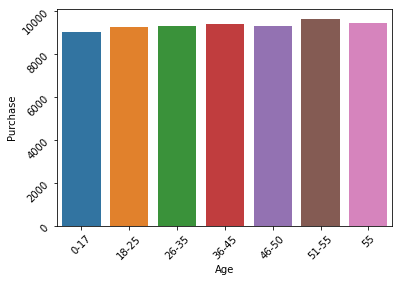

In [52]:
# Bringing data as a bar graph so it's easier to assess age groups vs. purchase total 

sns.barplot(x=("Age"), y=("Purchase"), data=df_purchase_age).tick_params(labelrotation=45)

#### Now that it was seen that both Genre and Age do impact how much a customer will spend while separately, grouping both data will present a much clearer view of the purchase habits:

In [53]:
purch_gender_age = df_blackfriday_sales.loc[:,["Gender", "Age","Purchase"]]

# Pivot Table with Purchase Average
pv_purch_gender_age = purch_gender_age.pivot_table(purch_gender_age,
                                                   index = ["Gender", "Age"],aggfunc = "mean")

pv_purch_gender_age

Purchase
Gender Age               
F      0-17   8444.703210
       18-25  8405.430852
       26-35  8791.798654
       36-45  9046.573808
       46-50  8929.448740
       51-55  9131.451837
       55     9119.577196
M      0-17   9312.322227
       18-25  9506.501081
       26-35  9470.621052
       36-45  9517.126321
       46-50  9429.151563
       51-55  9789.020476
       55     9557.058094

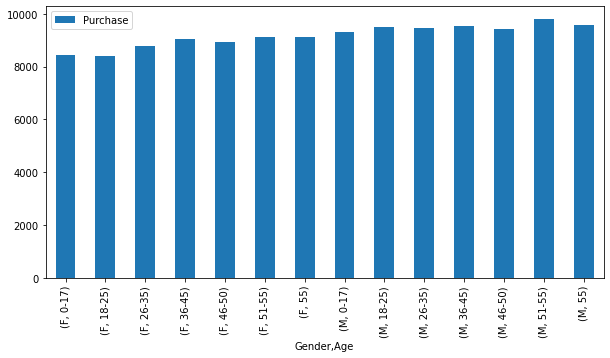

In [80]:
# Bringing data as a bar graph so it's easier to assess age groups vs. genre vs. purchase total 
pv_purch_gender_age.plot(kind='bar', figsize=(10, 5))
plt.show()

From the previous graph, it can be seen that the average number of purchases made by "Women" remains very close regardless of age.

Furthermore, it's clear that not only "Male" users tend to spend most, but they also are the heaviest spenders when assessing Age Group.

Male customers amongst the ages of 51 to 55 represent the heaviest spenders.

#### After understanding consumer habits that are influenced by one's genre and age, it's necessary to determine wether the marital status can also play a big role into one's purchase habits.

In [55]:
df_purchase_maritalstatus = df_blackfriday_sales.groupby(by=["Marital_Status"])[["Purchase"]].mean()
df_purchase_maritalstatus = df_purchase_maritalstatus.reset_index()
df_purchase_maritalstatus

,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


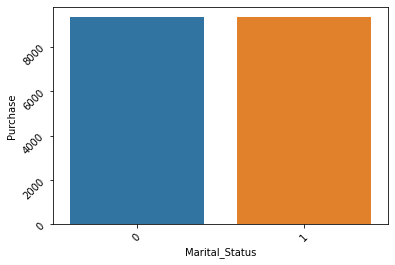

In [56]:
# Bringing data as a bar graph so it's easier to assess marital status vs. purchase total

sns.barplot(x=("Marital_Status"), y=("Purchase"), data=df_purchase_maritalstatus).tick_params(labelrotation=45)

As previously seen, it's possible to identify that there's more single customers making purchases during Black Friday; however, the group that had higher expenses was the one of married customers.

The average spending between both marital status is quite similar.

#### Not only one's genre, age and marital status can influence spending habits, one's occupation can also play a big role in it.
Looking at the data, a clearer understanding can be acquired:

In [57]:
df_purchase_occupation = df_blackfriday_sales.groupby(by=["Occupation"])[["Purchase"]].mean()
df_purchase_occupation = df_purchase_occupation.reset_index()
df_purchase_occupation

,Occupation,Purchase
0,0,9186.946726
1,1,9017.703095
2,2,9025.938982
3,3,9238.077277
4,4,9279.026742
5,5,9388.848978
6,6,9336.378620
7,7,9502.175276
8,8,9576.508530
9,9,8714.335934


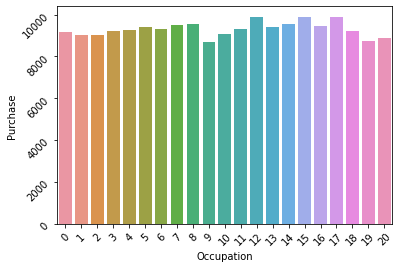

In [58]:
# Bringing data as a bar graph so it's easier to assess occupation vs. purchase total
sns.barplot(x=("Occupation"), y=("Purchase"), data=df_purchase_occupation).tick_params(labelrotation=45)

#### When assessing the Purchase behaviour according to one's "Occupation", it's possible to see that this data has also an impact, meaning that those whose professional occupation belongs to 12, 15 and 17 are the heaviest spenders during blackfriday.

- In the data presented below, there's an assessment of purchase behaviour taking into account one's Genre, Age and Professional Occupation.

In [59]:
purch_habits = df_blackfriday_sales.loc[:,["Gender", "Age", "Occupation", "Purchase"]]

# Pivot Table with Purchase Average
pv_purch_habits = purch_habits.pivot_table(purch_habits,
                                           index=(["Gender", "Age", "Occupation"]),
                                           aggfunc = "mean")

pv_purch_habits = pv_purch_habits.reset_index()

pv_purch_habits

,Gender,Age,Occupation,Purchase
0,F,0-17,0,9189.356944
1,F,0-17,1,9982.919075
2,F,0-17,2,7892.977778
3,F,0-17,7,9121.638889
4,F,0-17,10,8316.528105
...,...,...,...,...
236,M,55,16,9304.741978
237,M,55,17,8715.551837
238,M,55,18,8617.709091
239,M,55,19,8224.539535


### The city where one lives can also determine the purchase behaviour when it comes to shopping during Black Friday.

As the data is masked, it's not possible to determine each city nor to understand if it represents a countryside city or a capital.
Nonetheless, it's quite clear that those living at city with category C tend to spend the most during BF.

In [60]:
df_purchase_citycategory = df_blackfriday_sales.groupby(by=["City_Category"])[["Purchase"]].mean()
df_purchase_citycategory = df_purchase_citycategory.reset_index()
df_purchase_citycategory

,City_Category,Purchase
0,A,8958.011014
1,B,9198.657848
2,C,9844.441855


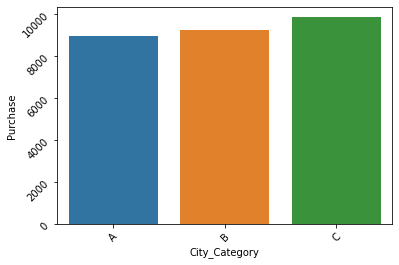

In [61]:
# Bringing data as a bar graph so it's easier to assess city category vs. purchase total
sns.barplot(x=("City_Category"), y=("Purchase"), data=df_purchase_citycategory).tick_params(labelrotation=45)

### City category somewhat has an impact into one's purchase behaviour; therefore, it's necessary to assess whether how many years one's been living in that specific city also portrays an impact at the purchase.

In [62]:
purch_yearslivedcity = df_blackfriday_sales.groupby(by=["Stay_In_Current_City_Years"])[["Purchase"]].mean()
purch_yearslivedcity = purch_yearslivedcity.reset_index()
purch_yearslivedcity

,Stay_In_Current_City_Years,Purchase
0,0,9247.238625
1,1,9319.865095
2,2,9397.607316
3,3,9350.685121
4,4,9346.370158


Looking at the data above, it's possible to understand that those who have been living in a city for 2 years are likely to spend more at Black Friday purchases.

It's possible to make an inference that this is linked to the fact that a person living for 2 years in a certain city:
- Is in a comfortable and stable situation financially, and/or
- Has defined that particular city as a long-term home;

Therefore, it's possible to make decoration adjustments and/or furnish one's house; thus, Black Friday deals are a huge plus.

Based on the data, the average spending for the period the customer lives in the city is equivalent amongst the years 2 to 4+.

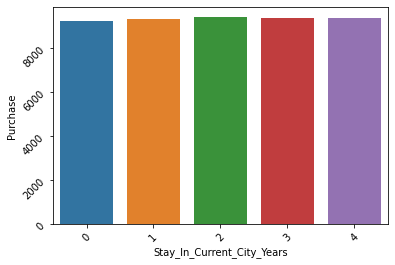

In [63]:
# Bringing data as a bar graph so it's easier to assess years lived in a city vs. purchase total
sns.barplot(x=("Stay_In_Current_City_Years"), y=("Purchase"), data=purch_yearslivedcity).tick_params(labelrotation=45)

#### Assessing City Category and Years lived in it can also determine one's purchase behaviour, as not necessarily a person who's been living for 2 years in city C will have the same spending habits as a person living for 2 years in city A & B.


Further observing the data, through the information it's possible to verify that the city in category C remains as the city with the customers who spend the most and, besides that, they represent the group that spends the most when assessing how long one's been living in that particular city category.

In [64]:
purch_city_stay = df_blackfriday_sales.groupby(by=["City_Category", "Stay_In_Current_City_Years"])[["Purchase"]].mean()
purch_city_stay = purch_city_stay.reset_index()
purch_city_stay

,City_Category,Stay_In_Current_City_Years,Purchase
0,A,0,9028.710591
1,A,1,8927.870743
2,A,2,9014.848463
3,A,3,8956.718849
4,A,4,8880.110251
5,B,0,8946.812564
6,B,1,9225.205104
7,B,2,9250.978676
8,B,3,9231.433705
9,B,4,9240.194353


In [65]:
purchase_gender_city = df_blackfriday_sales.loc[:,["Gender", "City_Category","Purchase"]]

# Pivot Table with Purchase Average
pv_purch_gender_city = purchase_gender_city.pivot_table(purchase_gender_city, 
                                                                           index = ["Gender", "City_Category"],
                                                                           aggfunc = "mean")

pv_purch_gender_city

Purchase
Gender City_Category              
F      A               8630.771856
       B               8590.518480
       C               9264.964642
M      A               9061.717739
       B               9400.754481
       C              10033.197730

In [66]:
pur_gen_age_city = df_blackfriday_sales.loc[:,["Gender", "Age", "City_Category","Purchase"]]

# Pivot Table with Purchase Average
pv_pur_gen_age_city = pur_gen_age_city.pivot_table(pur_gen_age_city,
                                                index = ["Gender", "Age", "City_Category"],aggfunc = "mean")

pv_pur_gen_age_city = pv_pur_gen_age_city.reset_index()

pv_pur_gen_age_city

,Gender,Age,City_Category,Purchase
0,F,0-17,A,7886.698179
1,F,0-17,B,8939.330729
2,F,0-17,C,8463.347411
3,F,18-25,A,8213.228492
4,F,18-25,B,8055.719317
5,F,18-25,C,9207.009581
6,F,26-35,A,8738.211626
7,F,26-35,B,8616.923493
8,F,26-35,C,9190.515763
9,F,36-45,A,8788.829380


In [67]:
pur_gen_occ_city = df_blackfriday_sales.loc[:,["Gender", "Occupation", "City_Category","Purchase"]]

# Pivot Table with Purchase Average
pv_pur_gen_occ_city = pur_gen_occ_city.pivot_table(pur_gen_occ_city,
                                                   index = ["Gender", "Occupation", "City_Category"],
                                                   aggfunc = "mean")

pv_pur_gen_occ_city = pv_pur_gen_occ_city.reset_index()

pv_pur_gen_occ_city

,Gender,Occupation,City_Category,Purchase
0,F,0,A,8951.309242
1,F,0,B,8639.637516
2,F,0,C,9171.550958
3,F,1,A,8775.600244
4,F,1,B,8235.173601
...,...,...,...,...
119,M,19,B,9121.524590
120,M,19,C,8959.955528
121,M,20,A,8586.632863
122,M,20,B,9316.301677


In [68]:
pur_gen_ag_occ_city = df_blackfriday_sales.loc[:,["Gender", "Age", "Occupation", "City_Category","Purchase"]]

# Pivot Table with Purchase Average
pv_pur_gen_ag_occ_city = pur_gen_ag_occ_city .pivot_table(pur_gen_ag_occ_city , 
                                                                 index = ["Gender", "Age", "Occupation", 
                                                                          "City_Category"], aggfunc = "mean")
pv_pur_gen_ag_occ_city = pv_pur_gen_ag_occ_city.reset_index()

pv_pur_gen_ag_occ_city 

,Gender,Age,Occupation,City_Category,Purchase
0,F,0-17,0,A,7601.700000
1,F,0-17,0,B,10202.267139
2,F,0-17,0,C,7757.198556
3,F,0-17,1,B,9982.919075
4,F,0-17,2,A,7458.394737
...,...,...,...,...,...
583,M,55,18,C,8617.709091
584,M,55,19,B,9787.062500
585,M,55,19,C,7775.431138
586,M,55,20,B,10906.804781


In [69]:
purch_analysis = df_blackfriday_sales.loc[:,["Gender", "Age", "Marital_Status", "Occupation", 
                                             "City_Category", "Stay_In_Current_City_Years", "Purchase"]]

# Pivot Table with Purchase Average
pv_purch_analysis = purch_analysis.pivot_table(purch_analysis,index = ["Gender", "Age", "Marital_Status", 
                                                                     "Occupation", "City_Category", 
                                                                     "Stay_In_Current_City_Years"], aggfunc = "mean")

pv_purch_analysis = pv_purch_analysis.reset_index()

pv_purch_analysis

,Gender,Age,Marital_Status,Occupation,City_Category,Stay_In_Current_City_Years,Purchase
0,F,0-17,0,0,A,2,7601.700000
1,F,0-17,0,0,B,1,9878.324538
2,F,0-17,0,0,B,3,12992.590909
3,F,0-17,0,0,C,0,7797.660714
4,F,0-17,0,0,C,1,7300.016304
...,...,...,...,...,...,...,...
2425,M,55,1,20,B,3,9165.892216
2426,M,55,1,20,C,0,11886.916667
2427,M,55,1,20,C,1,9843.285714
2428,M,55,1,20,C,2,11993.142857


A special thanks to [Gabriela Idalino](https://www.kaggle.com/gabrieloliveirasan) for helping Ana Gabriela Almeida in order to understand how to generate all those graphs into a subgraph plot system!

Text(0.5, 1.0, 'Lived years in city vs Purchase')

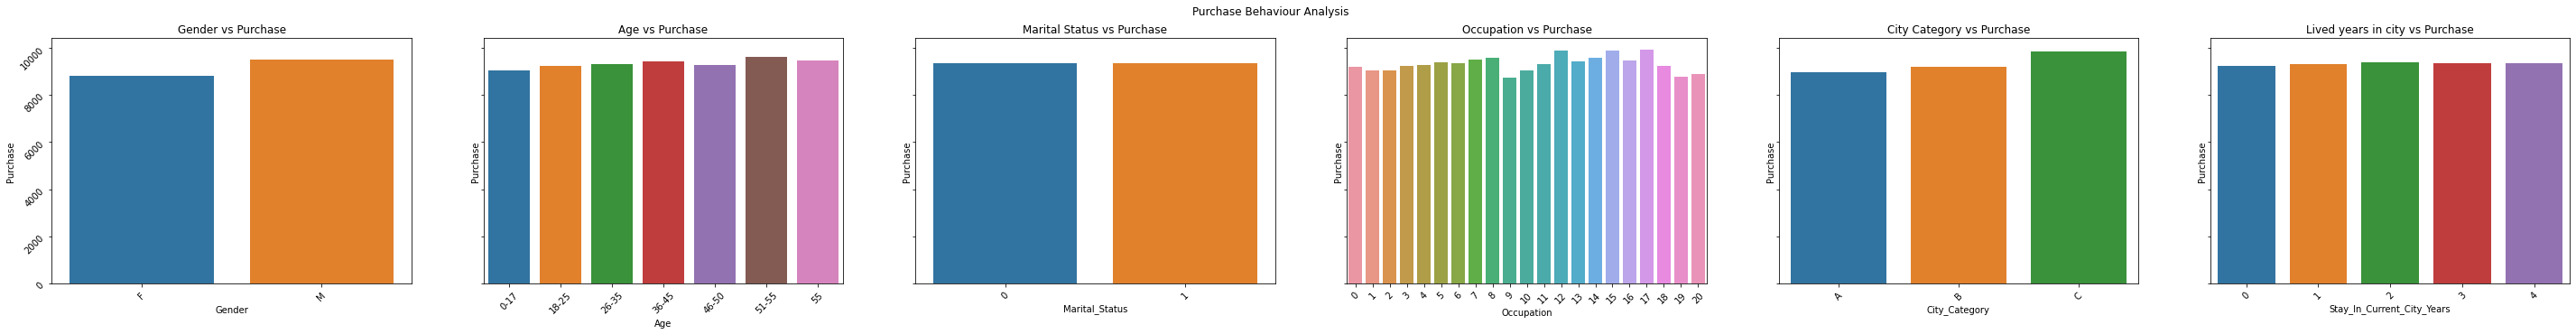

In [78]:
#### Generating all graphs to assess the complete customer behaviour at Black Friday Purchases


fig, axes = plt.subplots(1, 6, figsize=(50, 5), sharey=True)
fig.suptitle("Purchase Behaviour Analysis")


# Gender
sns.barplot(ax=axes[0], x=("Gender"), y=("Purchase"), data= df_purchase_gender).tick_params(labelrotation=45)
axes[0].set_title("Gender vs Purchase")


# Age
sns.barplot(ax=axes[1], x=("Age"), y=("Purchase"), data= df_purchase_age).tick_params(labelrotation=45)
axes[1].set_title("Age vs Purchase")

# Marital Status
sns.barplot(ax=axes[2], x=("Marital_Status"), y=("Purchase"), data= df_purchase_maritalstatus).tick_params(labelrotation=45)
axes[2].set_title("Marital Status vs Purchase")

# Occupation
sns.barplot(ax=axes[3], x=("Occupation"), y=("Purchase"), data= df_purchase_occupation).tick_params(labelrotation=45)
axes[3].set_title("Occupation vs Purchase")

# City Category
sns.barplot(ax=axes[4], x=("City_Category"), y=("Purchase"), data= df_purchase_citycategory).tick_params(labelrotation=45)
axes[4].set_title("City Category vs Purchase")



# Years Lived in the City
sns.barplot(ax=axes[5], x=("Stay_In_Current_City_Years"), y=("Purchase"), data= purch_yearslivedcity).tick_params(labelrotation=45)
axes[5].set_title("Lived years in city vs Purchase")